In [54]:
import pandas as pd
import os
import numpy as np
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import box

pd.set_option('display.max_columns', None) 

### True Color Image 

In [32]:
# Filepath using OS for reproducibility
landsat_df = rioxr.open_rasterio(os.path.join('data', 
                                             'landsat8-2018-01-26-sb-simplified.nc'))

thomas_boundary = gpd.read_file(os.path.join('data', 
                                    'thomas_fire.shp'))

In [33]:
landsat_df.head()

<xarray.Dataset> Size: 1kB
Dimensions:      (band: 1, x: 5, y: 5)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 40B 1.213e+05 1.216e+05 ... 1.221e+05 1.224e+05
  * y            (y) float64 40B 3.952e+06 3.952e+06 ... 3.952e+06 3.951e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 200B ...
    green        (band, y, x) float64 200B ...
    blue         (band, y, x) float64 200B ...
    nir08        (band, y, x) float64 200B ...
    swir22       (band, y, x) float64 200B ...

In [34]:
landsat_df.dtypes

Frozen({'red': dtype('float64'), 'green': dtype('float64'), 'blue': dtype('float64'), 'nir08': dtype('float64'), 'swir22': dtype('float64')})

In [35]:
landsat_df.rio.crs

CRS.from_epsg(32611)

##### Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables and dimensions.


The landsat data is an xarray.Dataset with 3 dimensions: band, x, and y. The band dimension has a length of 1 while both the x and y dimensions have lengths of 5. The data variables each show a different pieces that make up the false color imagery including, red, green, blue, nir08 (near infrared, and swir (shortwave infrared). The CRS is EPSG 32611.

In [36]:
# Drop the band dimension of the data
landsat_df = landsat_df.squeeze().drop_vars('band')

# Check the dataset
landsat_df

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

Without creating any new variables:

select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
convert it to a numpy.array using the to_array() method, and then
use .plot.imshow() to create an RGB image with the data. There will be a warning, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


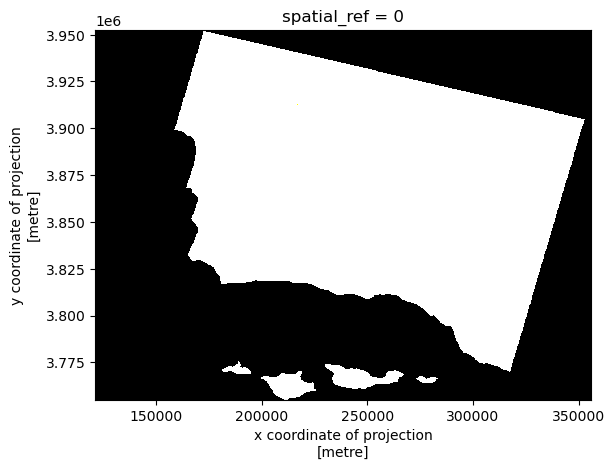

In [37]:
# Select red, green, and blue variables into an array and plot
landsat_df[['red', 'green', 'blue']].to_array().plot.imshow()

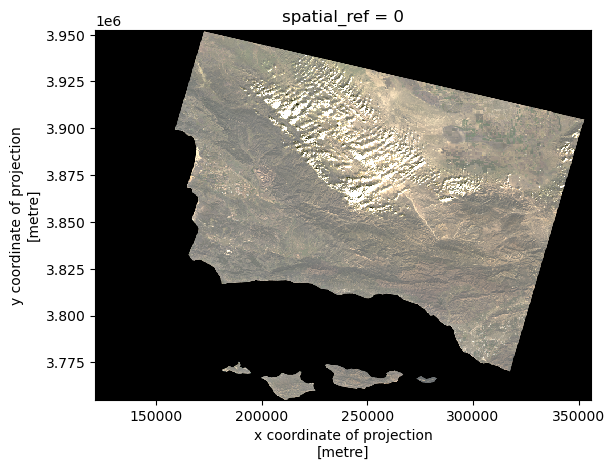

In [38]:
# Robust parameters resolve the cloud cover issue
landsat_df[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

In the first landsat image, the output did not show any of the actual land characteristics due to the cloud cover issue. The RGB values were outliers, allowing the image to be squished into what looks like a blank outline of the land area. In the second output, using the `robust=True` argument adjusts the scale to be more sensitive to outliers, giving us the true RGB image. 

### False Color Image

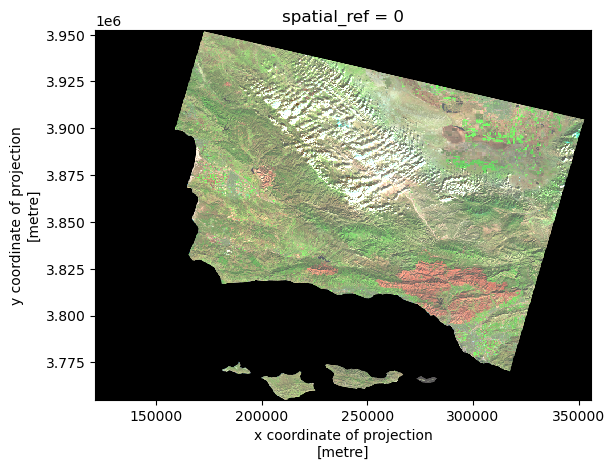

In [39]:
# Select short infrared, near infrared, and red bands to plot
# Make plot sensitive to outliers with robust = True
landsat_df[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

### Map Thomas Fire Perimeter

In [45]:
# Check to make sure CRS's match, if not reproject
thomas_boundary.crs == landsat_df.rio.crs

False

In [50]:
# Reproject
thomas_boundary= thomas_boundary.to_crs("EPSG:4326")
landsat_df = landsat_df.rio.reproject("EPSG:4326")

thomas_boundary.crs == landsat_df.rio.crs

True

Text(44.847222222222214, 0.5, 'Y Coordinate of Projection (m)')

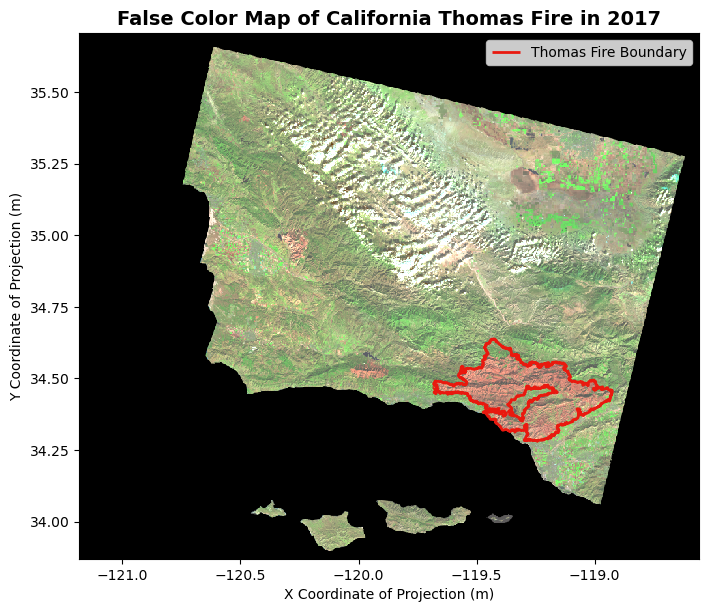

In [93]:
fig, ax = plt.subplots(figsize = (8,8))

landsat_df[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

thomas_boundary.boundary.plot(ax = ax,
                             color = '#E9190F',
                             label = 'Thomas Fire Boundary',
                             linewidth = 2)
ax.legend()

ax.set_title("False Color Map of California Thomas Fire in 2017", fontsize=14, fontweight='bold')
ax.set_xlabel('X Coordinate of Projection (m)')
ax.set_ylabel('Y Coordinate of Projection (m)')

### Figure Description

The map above shows a false color image of the land burned by the Thomas Fire in California and surrounding areas.  The boundary of the 2017 Thomas Fire is indicated by the red outline on the map. The false color image utilizes the short inrared, near infrared, and red bands in the electromagnetic spectrum to visualize changes in vegetation. Furthermore, the false color imaging shows the secondary succession within the Thomas Fire boundaries, that would not be otherwise noticeable with a True Color Imaging technique. Using this false color, the difference between the land outside of the burned areas is starkly indicated by the green color. 